# Working With Image Data

In [1]:
from sklearn.datasets import load_digits #loading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()

## Exploring keys 

In [2]:
digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

## Extracting target values and working data

### i) First extracting target values

In [3]:
labels = pd.Series(digits_data['target'])

### ii) Extracting the working data

In [4]:
data = pd.DataFrame(digits_data['data'])
data.head(1)

0    1    2     3    4    5    6    7    8    9   ...   54   55   56   57  \
0  0.0  0.0  5.0  13.0  9.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    58    59    60   61   62   63  
0  6.0  13.0  10.0  0.0  0.0  0.0  

[1 rows x 64 columns]

## Plotting images 

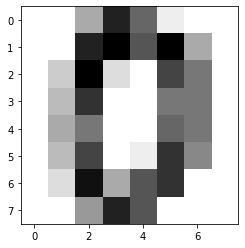

In [5]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

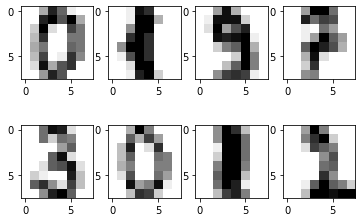

In [6]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Model

Now let's build a model that can identify handwritten digits. Here I used K-Nearest Neighbors Model for classifying the handwritten digits.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

Here I got 96% accuracy using n_neigbors=1. 
Now let's check if using other values in n_neigbors yeilds better accuracy or not.

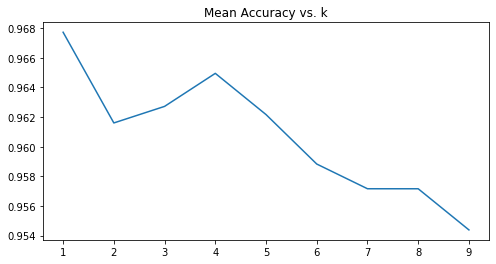

In [8]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

From above, we can see that when using k-nearest neighbor model with n_neighbor value as 1 yeilds maximum accuracy. Thus, to identify handwritten digits using k-Nearest Neighbor Model, using n_neighbor=1 gives highest accuracy.